#### Census Data Analysis -- Age

In [17]:
# necessary imports
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
plt.style.use('default')
import geopandas as gpd
import geodatasets
import ast
from shapely import wkt
import folium



In [18]:
#reading in data
populationDemographics = pd.read_csv('../../data/clean/population_demographics.csv')
populationDemographics

,geoid,qualifying name,current land area (sq. m),current water area (sq. m),total population,population density (per sq. mile),total population: male,total population: female,total: under 5 years,total: 5 to 9 years,...,total population: female: 75 to 84 years,total population: female: 85 years and over,total population: white alone,total population: black or african american alone,total population: american indian and alaska native alone,total population: asian alone,total population: native hawaiian and other pacific islander alone,total population: some other race alone,total population: two or more races,geometry
0,17031823303,"Census Tract 8233.03, Cook County, Illinois",2008920,0,4059,5233.042,1883,2176,191,402,...,160,26,3230,317,40,0,0,296,176,"POLYGON ((-87.720963 41.683952, -87.720304 41...."
1,17031823304,"Census Tract 8233.04, Cook County, Illinois",3553267,0,6316,4603.753,3354,2962,384,404,...,138,101,3811,1923,11,52,0,236,283,MULTIPOLYGON (((-87.72003618903081 41.68396731...
2,17031740400,"Census Tract 7404, Cook County, Illinois",2838804,0,4738,4322.723,2164,2574,321,289,...,111,49,4169,275,0,155,0,0,139,"POLYGON ((-87.72008 41.691274, -87.719372 41.6..."
3,17031740300,"Census Tract 7403, Cook County, Illinois",1320728,0,5017,9838.490,2551,2466,344,370,...,58,60,4546,78,0,42,0,168,183,"POLYGON ((-87.720431 41.698569, -87.720066 41...."
4,17031822802,"Census Tract 8228.02, Cook County, Illinois",1305003,0,3750,7442.477,1845,1905,207,430,...,144,60,3184,185,5,71,0,84,221,"MULTIPOLYGON (((-87.720752 41.702042, -87.7207..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864,17031320400,"Census Tract 3204, Cook County, Illinois",804124,649677,3058,9849.455,1525,1533,12,11,...,38,0,2075,330,0,457,0,46,150,"POLYGON ((-87.627636 41.882057, -87.627594 41...."
865,17031320101,"Census Tract 3201.01, Cook County, Illinois",465726,25911,7952,44222.540,3377,4575,208,306,...,425,109,4729,536,0,1864,0,427,396,"POLYGON ((-87.620855 41.881881, -87.620825 41...."
866,17031081403,"Census Tract 814.03, Cook County, Illinois",331289,1429583,8984,70236.120,4502,4482,258,26,...,32,0,5542,174,0,2757,0,228,283,"MULTIPOLYGON (((-87.624311 41.889115, -87.6243..."
867,17031081402,"Census Tract 814.02, Cook County, Illinois",589626,0,5613,24655.630,2697,2916,288,241,...,181,0,3476,276,17,1352,0,102,390,"POLYGON ((-87.617537 41.893453, -87.617164 41...."


In [19]:
# selecting relevant columns from overall populationDemographics dataframe
raceOnly = populationDemographics[['geoid','geometry','qualifying name', 'total population', 'total population: white alone', 
                                   'total population: black or african american alone',
                                   'total population: american indian and alaska native alone',
                                   'total population: asian alone', 
                                   'total population: native hawaiian and other pacific islander alone', 
                                   'total population: some other race alone', 
                                   'total population: two or more races']]
raceOnly

,geoid,geometry,qualifying name,total population,total population: white alone,total population: black or african american alone,total population: american indian and alaska native alone,total population: asian alone,total population: native hawaiian and other pacific islander alone,total population: some other race alone,total population: two or more races
0,17031823303,"POLYGON ((-87.720963 41.683952, -87.720304 41....","Census Tract 8233.03, Cook County, Illinois",4059,3230,317,40,0,0,296,176
1,17031823304,MULTIPOLYGON (((-87.72003618903081 41.68396731...,"Census Tract 8233.04, Cook County, Illinois",6316,3811,1923,11,52,0,236,283
2,17031740400,"POLYGON ((-87.72008 41.691274, -87.719372 41.6...","Census Tract 7404, Cook County, Illinois",4738,4169,275,0,155,0,0,139
3,17031740300,"POLYGON ((-87.720431 41.698569, -87.720066 41....","Census Tract 7403, Cook County, Illinois",5017,4546,78,0,42,0,168,183
4,17031822802,"MULTIPOLYGON (((-87.720752 41.702042, -87.7207...","Census Tract 8228.02, Cook County, Illinois",3750,3184,185,5,71,0,84,221
...,...,...,...,...,...,...,...,...,...,...,...
864,17031320400,"POLYGON ((-87.627636 41.882057, -87.627594 41....","Census Tract 3204, Cook County, Illinois",3058,2075,330,0,457,0,46,150
865,17031320101,"POLYGON ((-87.620855 41.881881, -87.620825 41....","Census Tract 3201.01, Cook County, Illinois",7952,4729,536,0,1864,0,427,396
866,17031081403,"MULTIPOLYGON (((-87.624311 41.889115, -87.6243...","Census Tract 814.03, Cook County, Illinois",8984,5542,174,0,2757,0,228,283
867,17031081402,"POLYGON ((-87.617537 41.893453, -87.617164 41....","Census Tract 814.02, Cook County, Illinois",5613,3476,276,17,1352,0,102,390


The following cell plots a heat map of the percent of each community that is black

Text(0.5, 1.0, 'Percent Black per Census Tract')

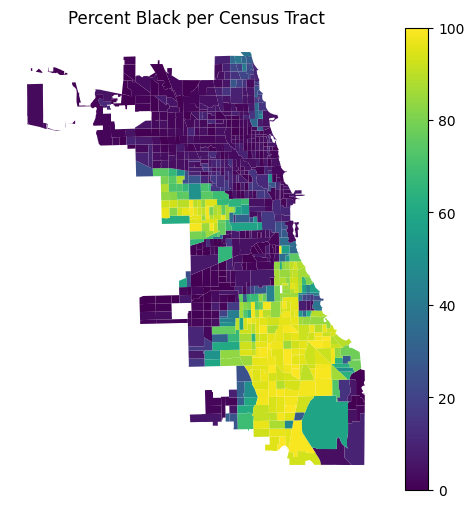

In [20]:
# this cell makes a copy of the raceOnly data frame so we can manipulate without affecting our primary dataset
blackRaceOnly = raceOnly.copy(deep=True)

# this cell calculates the percent of each census tract that is black and appends a column with those values to the data frame
blackRaceOnly['percent black'] = (blackRaceOnly['total population: black or african american alone']/blackRaceOnly['total population'])*100

# the following converts the data frame to a geo data frame and plots estimated percent of black members of each community
blackRaceOnly = gpd.GeoDataFrame(
    blackRaceOnly.loc[:, [c for c in blackRaceOnly.columns if c != "geometry"]],
    geometry=gpd.GeoSeries.from_wkt(blackRaceOnly["geometry"]),
    crs="epsg:4326",
    )

fig, ax = plt.subplots(1, figsize=(6, 6))
blackRaceOnly.plot(column='percent black', legend=True, ax=ax)
ax.axis('off')
ax.set_title('Percent Black per Census Tract', fontdict={'fontsize': '12', 'fontweight' : '3'})

From this map, we see how black communities are concentrated in two regions of Chicago. We can compare this against the locations of libraries.

The following cell plots a heat map of the percent of each community that is asian

Text(0.5, 1.0, 'Percent Asian per Census Tract')

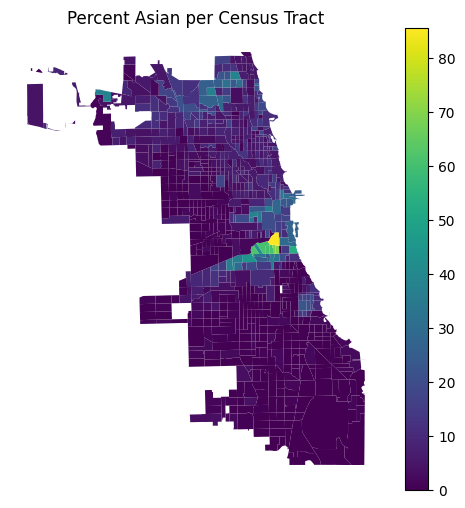

In [21]:
# this  makes a copy of the raceOnly data frame so we can manipulate without affecting our primary dataset
asianRaceOnly = raceOnly.copy(deep=True)

# this calculates the percent of each census tract that is black and appends a column with those values to the data frame
asianRaceOnly['percent asian'] = (asianRaceOnly['total population: asian alone']/asianRaceOnly['total population'])*100

# the following converts the data frame to a geo data frame and plots estimated percent of black members of each community
asianRaceOnly = gpd.GeoDataFrame(
    asianRaceOnly.loc[:, [c for c in asianRaceOnly.columns if c != "geometry"]],
    geometry=gpd.GeoSeries.from_wkt(asianRaceOnly["geometry"]),
    crs="epsg:4326",
    )

fig, ax = plt.subplots(1, figsize=(6, 6))
asianRaceOnly.plot(column='percent asian', legend=True, ax=ax)
ax.axis('off')
ax.set_title('Percent Asian per Census Tract', fontdict={'fontsize': '12', 'fontweight' : '3'})

From this map, we see that there is a large asian population concentrated in Chinatown and nearby areas. 

The following cell generates a map labelling each community by most populous racial group

Text(0.5, 1.0, 'Most Populous Race by Census Tract')

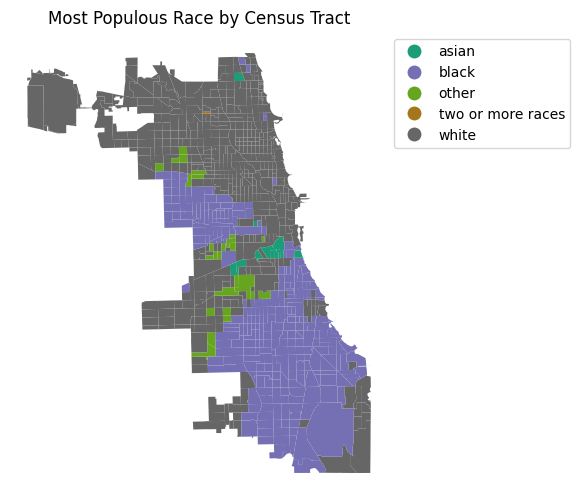

In [22]:
# this  makes a copy of the raceOnly data frame so we can manipulate without affecting our primary dataset
populousRace = raceOnly.copy(deep=True)

# this makes a new array in which we can enter the most populous racial group of each community
mostPopulousRace = []

# this for loop iterates through the data frame to find the most populous racial group in each census track and appends it to the new array. 
for index, row in populousRace.iterrows():
    stats=[row['total population: white alone'], row['total population: black or african american alone'],
           row['total population: american indian and alaska native alone'],
          row['total population: asian alone'],row['total population: native hawaiian and other pacific islander alone'],
          row['total population: some other race alone'],row['total population: two or more races']]
    raceIndeces = ['white','black', 'american native', 'asian', 'pacific islander', 'other', 'two or more races']
    max_value = max(stats)
    index = stats.index(max_value)
    mostPopulousRace.append(raceIndeces[index])
    
# this line appends the new column with most populous race to the data frame created in this cell
populousRace['most populous race']= mostPopulousRace

# the following converts the data frame to a geo data frame and plots the most populous racial groups by census tract

populousRace = gpd.GeoDataFrame(
    populousRace.loc[:, [c for c in populousRace.columns if c != "geometry"]],
    geometry=gpd.GeoSeries.from_wkt(populousRace["geometry"]),
    crs="epsg:4326",
    )

fig, ax = plt.subplots(1, figsize=(10, 6))
populousRace.plot("most populous race", legend = True, legend_kwds={'bbox_to_anchor': (1.5, 1)}, ax=ax, cmap = 'Dark2')
ax.axis('off')
ax.set_title('Most Populous Race by Census Tract', fontdict={'fontsize': '12', 'fontweight' : '3'})

From this map, we see the effects of redlining and how Chicago is primarily structured in enclaves. Something important to note is this data does not differentiate between Hispanic and non-Hispanic white residents so the map may be misleading in terms of understanding the breakdown of residents in each tract.

In [23]:
raceOnly.head(1)

,geoid,geometry,qualifying name,total population,total population: white alone,total population: black or african american alone,total population: american indian and alaska native alone,total population: asian alone,total population: native hawaiian and other pacific islander alone,total population: some other race alone,total population: two or more races
0,17031823303,"POLYGON ((-87.720963 41.683952, -87.720304 41....","Census Tract 8233.03, Cook County, Illinois",4059,3230,317,40,0,0,296,176


In [24]:
raceOnly.set_index('geoid',inplace=True)

old_columns = [
 'total population: white alone',
 'total population: black or african american alone',
 'total population: american indian and alaska native alone',
 'total population: asian alone',
 'total population: native hawaiian and other pacific islander alone',
 'total population: some other race alone',
 'total population: two or more races']

new_columns = ['Percent: White Alone',
 'Percent: Black or African American Alone',
 'Percent: American Indian and Alaska Native Alone',
 'Percent: Asian Alone',
 'Percent: Native Hawaiian and Other Pacific Islander Alone',
 'Percent: Some Other Race Alone',
 'Percent: Two or More Races']

for i in range(1,len(new_columns)+1):#from 1 to 18
    raceOnly[new_columns[i-1]] = raceOnly[old_columns[i-1]]/raceOnly['total population']

/tmp/ipykernel_1715421/2345895577.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raceOnly[new_columns[i-1]] = raceOnly[old_columns[i-1]]/raceOnly['total population']
/tmp/ipykernel_1715421/2345895577.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raceOnly[new_columns[i-1]] = raceOnly[old_columns[i-1]]/raceOnly['total population']
/tmp/ipykernel_1715421/2345895577.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [26]:
race_demos_copy = raceOnly[['geometry','qualifying name', 'total population',
                            'Percent: White Alone',
 'Percent: Black or African American Alone',
 'Percent: American Indian and Alaska Native Alone',
 'Percent: Asian Alone',
 'Percent: Native Hawaiian and Other Pacific Islander Alone',
 'Percent: Some Other Race Alone',
 'Percent: Two or More Races']]
race_demos = race_demos_copy

race_demos.head(1)

,geometry,qualifying name,total population,Percent: White Alone,Percent: Black or African American Alone,Percent: American Indian and Alaska Native Alone,Percent: Asian Alone,Percent: Native Hawaiian and Other Pacific Islander Alone,Percent: Some Other Race Alone,Percent: Two or More Races
geoid,,,,,,,,,,
17031823303,"POLYGON ((-87.720963 41.683952, -87.720304 41....","Census Tract 8233.03, Cook County, Illinois",4059,0.795763,0.078098,0.009855,0.0,0.0,0.072924,0.04336


In [29]:
race_demos['Percent Overlap'] = 0.1
race_demos.head(1)

/tmp/ipykernel_1715421/1160122441.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_demos['Percent Overlap'] = 0.1


,geometry,qualifying name,total population,Percent: White Alone,Percent: Black or African American Alone,Percent: American Indian and Alaska Native Alone,Percent: Asian Alone,Percent: Native Hawaiian and Other Pacific Islander Alone,Percent: Some Other Race Alone,Percent: Two or More Races,Percent Overlap
geoid,,,,,,,,,,,
17031823303,"POLYGON ((-87.720963 41.683952, -87.720304 41....","Census Tract 8233.03, Cook County, Illinois",4059,0.795763,0.078098,0.009855,0.0,0.0,0.072924,0.04336,0.1


In [31]:
pop_in_branch = (race_demos['Percent Overlap']  * race_demos['total population']).sum()
Branch_pop_Asian = (race_demos['Percent Overlap'] * race_demos['Percent: Asian Alone'] * race_demos['total population']).sum()
pop_in_branch 

310071.30000000005

In [32]:
Branch_pop_Asian

20518.6

In [34]:
Branch_pop_Asian/pop_in_branch

0.06617381228123982

In [43]:
def Race_by_branch(DemographicsVariables):
    """ This function takes the population of each variables and devide it by the population to give us the perecntage of how many people have a specific race in the overlapping area of the branch"""
    pop_in_branch = (race_demos['Percent Overlap']  * race_demos['total population']).sum()
    Branch_pop_Var = (race_demos['Percent Overlap'] * race_demos[DemographicsVariables] * race_demos['total population']).sum()
    result = Branch_pop_Var/pop_in_branch
    return result
Race_by_branch('Percent: Asian Alone')

0.06617381228123982

In [42]:
Race_by_branch('Percent: Black or African American Alone')

0.27407760731160863

In [45]:
Race_by_branch('Percent: White Alone')

0.4705185549259153

In [27]:
race_demos.to_csv('../../data/extra_data/race_demos.csv')